In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [2]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
data = pd.read_excel('data.xlsx', sheet_name= "Second", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2011,685,82092.69810,27420.5750,3307.8302,18.0,22.4,27.3,31.1,32.8,30.9,...,29.3,27.0,21.4,78.3,105.6,49.4,0.0,0.0,4.1,5.8
2012,729,103927.08685,31394.7680,3373.0787,19.0,23.0,27.7,30.9,32.6,30.8,...,29.8,27.6,22.5,21.4,79.9,17.1,14.0,0.1,0.0,63.4
2013,785,99677.19450,37919.8715,3513.0847,19.4,24.5,29.9,33.9,34.1,29.6,...,29.2,25.9,19.9,54.0,61.5,0.9,0.0,19.8,31.9,40.1
2014,780,94715.40840,28671.8170,4232.6770,22.4,26.8,30.9,34.8,36.0,31.2,...,29.3,26.3,21.3,22.1,34.9,89.8,3.5,0.2,95.4,54.9
2015,857,88612.86270,27352.5125,3949.8155,17.9,24.3,28.0,34.2,35.0,30.9,...,30.0,28.4,23.5,21.5,65.7,4.8,0.4,10.9,130.0,32.1


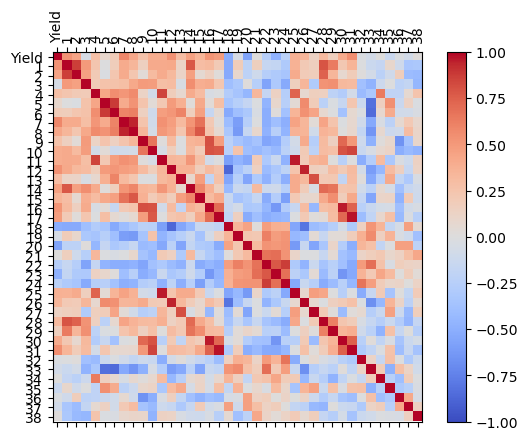

In [4]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

In [5]:
corr

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Yield,1.000000,0.524893,0.437874,-0.050052,0.278980,0.092577,0.187386,0.579163,0.424980,0.263774,...,0.160532,0.398978,0.551701,-0.028576,-0.074240,0.007498,-0.139615,-0.026708,-0.082972,0.014465
1,0.524893,1.000000,0.866901,0.496853,0.237697,-0.000135,0.178619,0.404662,0.337936,0.154655,...,0.639043,0.225862,0.345875,-0.014871,-0.125844,-0.170677,0.090675,-0.094997,-0.335293,-0.316419
2,0.437874,0.866901,1.000000,0.455160,0.200864,-0.027024,0.232736,0.404833,0.231332,0.036727,...,0.340372,0.071119,0.187399,0.013491,-0.077353,-0.228310,-0.096695,0.174936,-0.409906,-0.429157
3,-0.050052,0.496853,0.455160,1.000000,0.188238,0.256871,0.257903,0.288970,0.418540,0.489065,...,0.541224,0.320666,0.311583,-0.378271,-0.471173,-0.120776,-0.007711,-0.217004,-0.172573,-0.450588
4,0.278980,0.237697,0.200864,0.188238,1.000000,0.436462,0.550061,0.508330,0.566530,0.122150,...,-0.217845,-0.273868,-0.071675,-0.419713,-0.323666,0.639488,-0.201245,-0.202988,0.067384,0.242841
5,0.092577,-0.000135,-0.027024,0.256871,0.436462,1.000000,0.881721,0.399610,0.524460,0.247503,...,-0.030600,-0.152132,0.232305,-0.128099,-0.831167,0.148749,0.540791,-0.136963,0.137970,-0.026623
6,0.187386,0.178619,0.232736,0.257903,0.550061,0.881721,1.000000,0.597883,0.624107,0.145795,...,-0.009739,-0.366720,0.063045,-0.024695,-0.851642,0.072575,0.403517,-0.092356,-0.081433,-0.032499
7,0.579163,0.404662,0.404833,0.288970,0.508330,0.399610,0.597883,1.000000,0.940871,0.243720,...,0.248243,-0.019076,0.073731,-0.100159,-0.538313,-0.041959,-0.224271,0.062699,0.203783,0.085787
8,0.424980,0.337936,0.231332,0.418540,0.566530,0.524460,0.624107,0.940871,1.000000,0.339232,...,0.320671,0.003716,0.085058,-0.179390,-0.642685,0.074306,-0.118601,-0.095810,0.303855,0.102982
9,0.263774,0.154655,0.036727,0.489065,0.122150,0.247503,0.145795,0.243720,0.339232,1.000000,...,0.149834,0.717396,0.504387,-0.110209,-0.488018,0.009164,0.088609,-0.660259,-0.353815,0.096247


In [6]:
import pmdarima as pm


In [7]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame()

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [8]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -1.751202
p-value: 0.404943
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Non-stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: -1.412613
p-value: 0.576215
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Non-stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: 0.123396
p-value: 0.967623
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -0.068177
p-value: 0.952517
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Non-stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -0.921216
p-value: 0.780905
Critical Values:
	1%: -4.665
	5%:

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12856\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [9]:
data = data.diff(1)
data = data.dropna()
data.head()


,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2012,44.0,21834.38875,3974.1930,65.2485,1.0,0.6,0.4,-0.2,-0.2,-0.1,...,0.5,0.6,1.1,-56.9,-25.7,-32.3,14.0,0.1,-4.1,57.6
2013,56.0,-4249.89235,6525.1035,140.0060,0.4,1.5,2.2,3.0,1.5,-1.2,...,-0.6,-1.7,-2.6,32.6,-18.4,-16.2,-14.0,19.7,31.9,-23.3
2014,-5.0,-4961.78610,-9248.0545,719.5923,3.0,2.3,1.0,0.9,1.9,1.6,...,0.1,0.4,1.4,-31.9,-26.6,88.9,3.5,-19.6,63.5,14.8
2015,77.0,-6102.54570,-1319.3045,-282.8615,-4.5,-2.5,-2.9,-0.6,-1.0,-0.3,...,0.7,2.1,2.2,-0.6,30.8,-85.0,-3.1,10.7,34.6,-22.8
2016,153.0,37504.83420,13029.2133,-437.7280,2.6,-0.4,1.8,0.6,-0.2,-1.9,...,-0.1,-2.1,-0.4,15.1,22.2,40.8,-0.2,-2.7,-90.2,-32.1


In [10]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12856\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -0.144772
p-value: 0.944792
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
Non-stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: -5.089681
p-value: 0.000015
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
Stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -10.799697
p-value: 0.000000
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
Stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -2.126754
p-value: 0.233894
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Non-stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -15.823173
p-value: 0.000000
Critical Values:
	1%: -4.665
	5%: -3.3

In [11]:
# scaler = MinMaxScaler()
# data = data['Yield'].to_numpy()
# data = data.reshape(-1, 1)
# scaler.fit(data)
# sonuc = scaler.transform(data)

for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12856\4229674204.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [12]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2012,0.726817,0.783933,0.600934,0.366704,0.733333,0.606061,0.678571,0.304348,0.300000,0.346154,...,0.80,0.642857,0.770833,0.000000,0.311744,0.303048,0.726537,0.501272,0.560182,1.000000
2013,0.756892,0.424278,0.713356,0.384573,0.653333,0.742424,1.000000,1.000000,0.866667,0.134615,...,0.25,0.095238,0.000000,0.962366,0.363701,0.395630,0.273463,1.000000,0.794405,0.265880
2014,0.604010,0.414462,0.018212,0.523113,1.000000,0.863636,0.785714,0.543478,1.000000,0.673077,...,0.60,0.595238,0.833333,0.268817,0.305338,1.000000,0.556634,0.000000,1.000000,0.611615
2015,0.809524,0.398733,0.367643,0.283495,0.000000,0.136364,0.089286,0.217391,0.033333,0.307692,...,0.90,1.000000,1.000000,0.605376,0.713879,0.000000,0.449838,0.770992,0.811971,0.270417
2016,1.000000,1.000000,1.000000,0.246477,0.946667,0.454545,0.928571,0.478261,0.300000,0.000000,...,0.50,0.000000,0.458333,0.774194,0.652669,0.723404,0.496764,0.430025,0.000000,0.186025


In [13]:
print("Data shape: ", data.shape)
print("Data length: ", len(data))

Data shape:  (11, 39)
Data length:  11


In [14]:
train = data[:9]
test = data[9:]

In [15]:
train

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2012,0.726817,0.783933,0.600934,0.366704,0.733333,0.606061,0.678571,0.304348,0.300000,0.346154,...,0.80,0.642857,0.770833,0.000000,0.311744,0.303048,0.726537,0.501272,0.560182,1.000000
2013,0.756892,0.424278,0.713356,0.384573,0.653333,0.742424,1.000000,1.000000,0.866667,0.134615,...,0.25,0.095238,0.000000,0.962366,0.363701,0.395630,0.273463,1.000000,0.794405,0.265880
2014,0.604010,0.414462,0.018212,0.523113,1.000000,0.863636,0.785714,0.543478,1.000000,0.673077,...,0.60,0.595238,0.833333,0.268817,0.305338,1.000000,0.556634,0.000000,1.000000,0.611615
2015,0.809524,0.398733,0.367643,0.283495,0.000000,0.136364,0.089286,0.217391,0.033333,0.307692,...,0.90,1.000000,1.000000,0.605376,0.713879,0.000000,0.449838,0.770992,0.811971,0.270417
2016,1.000000,1.000000,1.000000,0.246477,0.946667,0.454545,0.928571,0.478261,0.300000,0.000000,...,0.50,0.000000,0.458333,0.774194,0.652669,0.723404,0.496764,0.430025,0.000000,0.186025
2017,0.501253,0.437712,0.417869,0.500716,0.493333,0.484848,0.571429,0.717391,0.766667,1.000000,...,0.55,0.857143,0.354167,0.926882,0.195730,0.326049,0.496764,0.290076,0.400781,0.879310
2018,0.784461,0.201578,0.000000,0.276445,0.720000,0.651515,0.660714,0.086957,0.233333,0.423077,...,0.40,0.523810,0.687500,0.279570,0.377936,0.536515,0.500000,0.498728,0.522446,0.744102
2019,0.330827,0.472164,0.500536,0.210947,0.386667,1.000000,0.964286,0.000000,0.000000,0.192308,...,0.55,0.357143,0.812500,1.000000,0.303203,0.464060,1.000000,0.498728,0.604424,0.000000
2020,0.852130,0.844852,0.839159,1.000000,0.733333,0.000000,0.000000,0.304348,0.300000,0.596154,...,0.60,1.000000,0.729167,0.108602,1.000000,0.616446,0.000000,0.549618,0.560833,0.285844


In [16]:
arima = pm.auto_arima(train['Yield'],X=train.drop(columns=['Yield']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=1,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-65.412, Time=0.79 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-69.633, Time=0.75 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-68.095, Time=0.60 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-67.412, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-67.623, Time=0.88 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 3.708 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  73.816
Date:                Tue, 27 Jun 2023   AIC                            -69.633
Time:                        11:03:30   BIC                            -71.742
Sample:                             0   HQIC                           -95.706
                                  - 9                                         
Co

In [17]:
pred=arima.predict(n_periods=2, X=test.drop(columns=['Yield']), alpha=0.05)
pred

C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9     0.542894
10    0.586967
dtype: float64

In [18]:
test

,Yield,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,,,,,,,,,,,,,,,,,,,,,
2021,0.000000,0.520332,0.305430,0.714418,0.520000,0.696970,0.982143,0.608696,0.866667,0.153846,...,1.0,0.0,0.020833,0.823656,0.000000,0.240943,0.755663,0.478372,0.651269,0.498185
2022,0.674185,0.000000,0.275693,0.000000,0.733333,0.560606,0.714286,0.347826,0.133333,0.423077,...,0.0,0.5,0.708333,0.181720,0.529537,0.669925,0.244337,0.498728,0.537411,0.558984


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


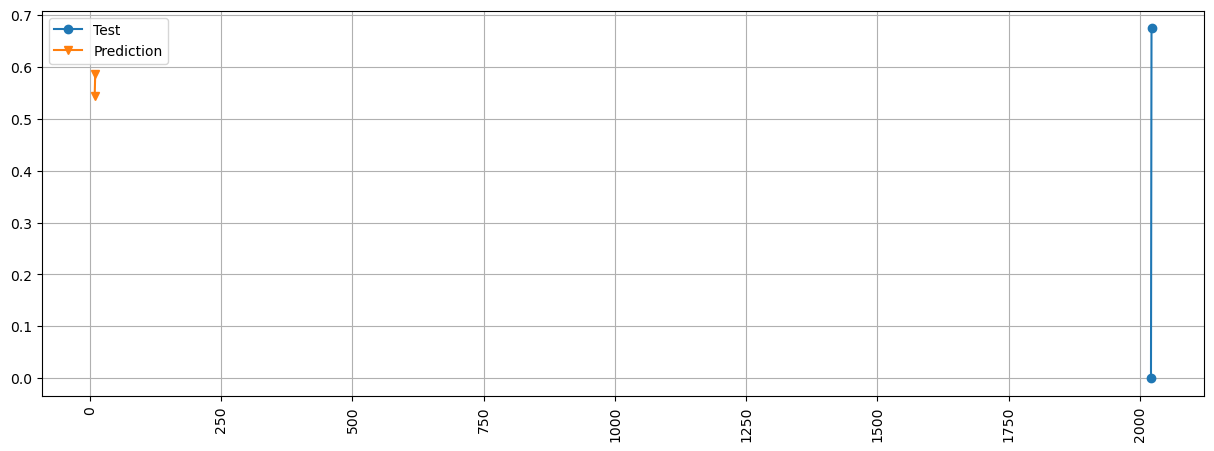

Mean Absolute  Error 0.3150559657595765
Mean Squared Error 0.15117039659786116
RMSE 0.38880637417339386
AIC values -69.63281765060955


In [20]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(test['Yield'], marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_error(test['Yield'], pred)
print("Mean Absolute  Error", mape)
print("="*50)
mse=mean_squared_error(test['Yield'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)
